
## Problem statement

### Build a relevant machine learning model to predict whether person has heart disease or not

In [1]:
#importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
#load the data
data = pd.read_csv('heart (1).csv')

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Domian Analysis

About all the attributes information should be included

### Basic checks

In [ ]:
data.shape

(918, 12)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
num_col = data.select_dtypes(include=['int64','float64'])
num_col.columns


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [4]:
cat_col = data.select_dtypes(include=['object'])
cat_col.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
#analysing the categorical data
for i in cat_col:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print('---------------------')

Sex ['M' 'F']
Sex
M    725
F    193
Name: count, dtype: int64
---------------------
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
---------------------
RestingECG ['Normal' 'ST' 'LVH']
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
---------------------
ExerciseAngina ['N' 'Y']
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
---------------------
ST_Slope ['Up' 'Flat' 'Down']
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
---------------------


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [ ]:
data.HeartDisease.unique()

array([0, 1])

In [ ]:
data.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

### EDA

### Preprocessing

In [5]:
#null values

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#duplicates
data.duplicated().sum()

0

Encoding

- Frequency encoding  
              1.happens on value_counts()
              2.HeartDisease.value_counts()
                      Yes - 508 ----> 1
                      No - 410  ----> 0

In [ ]:
#Encoding
cat_col.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
#Sex
data.Sex.unique()

array(['M', 'F'], dtype=object)

In [12]:
df1 = pd.get_dummies(data['Sex'],prefix = 'Sex',drop_first = True,dtype='int')

data = pd.concat([data,df1],axis=1).drop('Sex',axis=1)

In [13]:
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1


In [14]:
#ChestPainType
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
data.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [16]:
data.loc[data['ChestPainType'] == 'TA','ChestPainType'] = 0

data.loc[data['ChestPainType']=='ATA','ChestPainType'] = 1

data.loc[data['ChestPainType']=='NAP','ChestPainType'] = 2

data.loc[data['ChestPainType']=='ASY','ChestPainType'] = 3

In [17]:
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,2,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,1
3,48,3,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,2,150,195,0,Normal,122,N,0.0,Up,0,1


In [18]:
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [19]:
#RestingECG
data.loc[data['RestingECG']=='Normal','RestingECG']=2
data.loc[data['RestingECG']=='LVH','RestingECG']=1
data.loc[data['RestingECG']=='ST','RestingECG']=0

In [20]:
#ST_Slope

data.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [21]:
data.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [22]:
data.loc[data['ST_Slope']=='Down','ST_Slope'] = 0

data.loc[data['ST_Slope']=='Up','ST_Slope'] = 1
data.loc[data['ST_Slope']=='Flat','ST_Slope'] = 2


In [23]:
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,2,172,N,0.0,1,0,1
1,49,2,160,180,0,2,156,N,1.0,2,1,0
2,37,1,130,283,0,0,98,N,0.0,1,0,1
3,48,3,138,214,0,2,108,Y,1.5,2,1,0
4,54,2,150,195,0,2,122,N,0.0,1,0,1


In [24]:
#ExerciseAngina
data.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data.ExerciseAngina = lb.fit_transform(data['ExerciseAngina'])

In [26]:
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,2,172,0,0.0,1,0,1
1,49,2,160,180,0,2,156,0,1.0,2,1,0
2,37,1,130,283,0,0,98,0,0.0,1,0,1
3,48,3,138,214,0,2,108,1,1.5,2,1,0
4,54,2,150,195,0,2,122,0,0.0,1,0,1


In [27]:
data.dtypes

Age                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
Sex_M               int64
dtype: object

In [28]:
#using .loc for changing the values will not change the dtype of the column
# we need to do it explicitly
data['ChestPainType']= data['ChestPainType'].astype('int64')

data.RestingECG = data['RestingECG'].astype('int64')

data.ST_Slope = data['ST_Slope'].astype('int64')

In [29]:
data.dtypes

Age                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
Sex_M               int64
dtype: object

### Feature Selection

In [ ]:
# 1. drop the irrelevant columns
# for eg: if any constant columns in the data can be dropped

<Axes: >

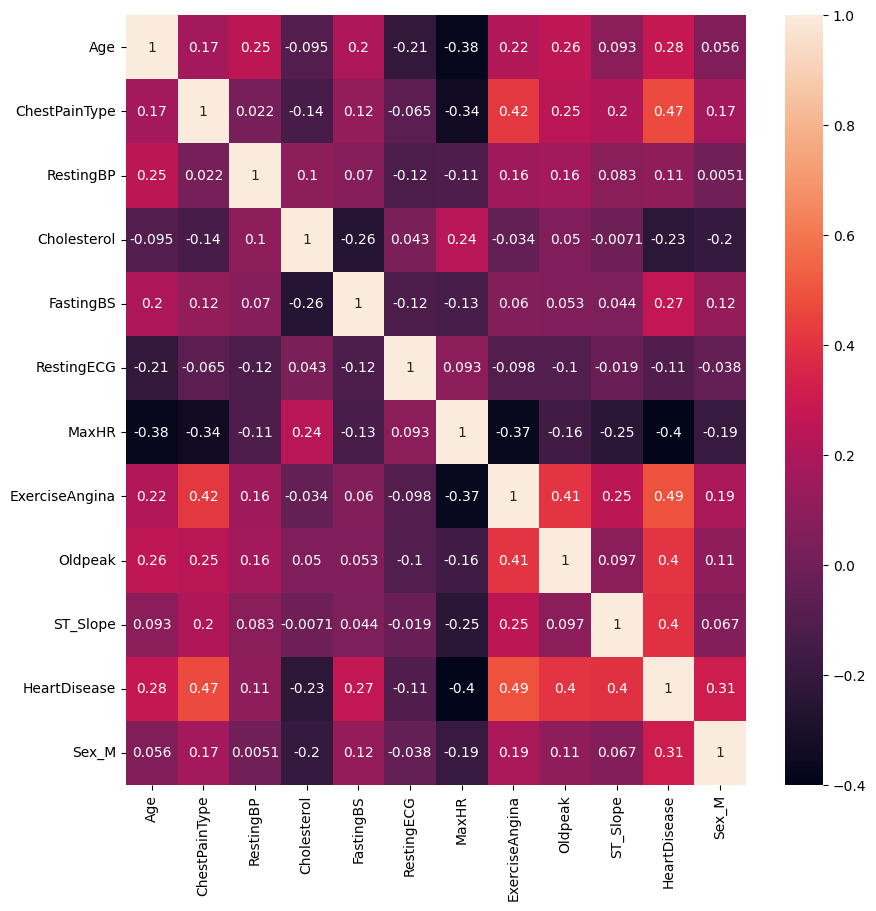

In [38]:
# 2. co relation plot
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

### Model Building

In [46]:
#split x and y

x = data.drop('HeartDisease',axis=1)
y = data.HeartDisease


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [42]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=70)

GB.fit(x_train,y_train)


GradientBoostingClassifier(n_estimators=70)

In [43]:
y_pred = GB.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8804347826086957

### All the algorithms should be applied on the data

1. LR

2. SVM

3. KNN

4. DT

5. RF

Then conclude the performance of the model by visualising by plotting a bar plot

### XG BOOST - XTREME GRADIENT BOOSTING

In [47]:
!pip install xgboost

In [48]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred)

0.8623188405797102

### Hyperparameter tune the model

1. n_estimators = number of estimators / number of base learners build on the data DT

2. max_depth = depth / height of the tree

3. learning rate = it is used to slow down the learning process , the slow the learning better the understanding is

4. Reg_alpha and Reg_lambda = these two are regularization paramter , which reduces overfitting

5. Gamma  = represents minimun loss reduction required to make further spilt on the data

          - i.e loss reduction at each split < gamma then the split will not be made
          
          - i.e we consider that mini loss of information as negligible amount of information
          loss
          

In [51]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [52]:
XGB = XGBClassifier(random_state=42,verbosity=0)

rcv= RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid,
                        n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)

In [53]:
rcv.fit(x_train, y_train) ##training data on randomsearch cv

cv_best_params = rcv.best_params_ ##it will give you best parameters

print(f"Best paramters: {cv_best_params})") ##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.8, 'reg_alpha': 3.2, 'n_estimators': 80, 'max_depth': 13, 'learning_rate': 0.7, 'gamma': 0.4})


In [54]:
model1 = XGBClassifier(reg_lambda= 0.8, reg_alpha= 3.2, n_estimators=80, max_depth=13,
                   learning_rate=0.7, gamma=0.4)
model1.fit(x_train, y_train)#training


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred1 = model1.predict(x_test)#testing

In [56]:
accuracy_score(y_test,y_pred1)

0.8804347826086957

In [ ]:
pd.read_csv('/content/heart (1).csv')